### 


<img src="https://media.giphy.com/media/2ae1SlEEdw1Qvc3KCA/giphy.gif" width=800>



## Initial Focus 

The purpose of this project is to create a classification model for the Human Resource department to help them make better decisions about the team assignments.

## Background Information

Work allocation is the process of effectively organizing resources and labor to meet the company's output goals of a task or project. The allocation is based on how the business will benefit from appropriately assigning resources and roles. Management can start by assessing the project's requirements in terms of the required skillset. This would be based on the employee's abilities, qualifications and experience, with each task being allocated to the best person for the role. The assigned staff member should be able to deliver on the requirements. The employees have gone through several tranings in the past, which is inluded in the dataset. On the basis of which employee can complete a particular task, they will be alocated to several teams to effectively manage the workload.


## Proposal

The work allocation process depends on a lot of factors like the experience of the employee or the level of training they have had during their duration. Here are the list of features that can be used to predict whether an employee is able to complete the task at hand or not.

> - task_completed: Target Variable



| Feature          	| Descriptions                              	|
| :---              | :---                                          |
| Employee Exp: 	| Number of years of experience an employee has.|
| Training Level 4: | Whether an employee has had Level 4 Training. |
| Training Level 6: | Whether an employee has had Level 6 Training. |
| Training Level 8: | Whether an employee has had Level 8 Training. |
| Task Completed:   | Whether an employee has completed the task.   |


## Specification

- Python: 3.9.12
- Pandas: 1.4.3
- Seaborn: 0.11.2
- sklearn: 1.1.2.
- Numpy: 1.21.5

This data contains the data of overall 75 employees.  The target variable of interest is task_completed. The data was provided as a part of our CIS: 508 Assignment.


## Table of Contents: <a class="anchor" id="steps"></a>
- [1. Libraries & Custom Functions](#libraries)
- [2. Data Wrangling](#wrangle)
   - [2.1 Data Gathering](#gather)
   - [2.2 Data Assessment](#assess)
   - [2.3 Data Cleaning](#clean)
- [3. Model Building](#model)
    - [3.1 Model 1](#model001)
    - [3.2 Model 2](#model002)
- [4. Model Comparison](#comparison)
- [5. Model Evaluation](#evaluation)
- [6. Conclusion](#conclusion)
- [7. Deployment](#deployment)


## 1. Libraries & Custom Functions <a class="anchor" id="libraries"></a>

> [Table of Contents](#steps)

In [1]:
import pandas as pd                                                     # Pandas offers data structures and operations for manipulating numerical tables and time series.

from sklearn.linear_model import LogisticRegression                     # The logistic model is a statistical model that models the probability of one event taking place 
                                                                        # by having the log-odds for the event be a linear combination of one or more independent variables.                      

from sklearn.metrics import accuracy_score                              # Importing only the required LogisticRegression, and accuracy_score (this function computes 
                                                                        # subset accuracy)from sklearn, because importing an entire package may be significant waste of RAM.

import pickle                                                           # Using Pickle to convert a Python object into a byte stream to store it in a file/database, 
                                                                        # maintain program state across sessions, making it easier to work with in deployments. 
import seaborn as sns                                                   # Importing Seaborn, A library for making statistical graphics in Python.
import matplotlib.pyplot as plt                                         # Importing matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.
pd.set_option('display.max_columns', None)                              # To print the above output in a wider format. This attribute is used to set the no. of columns 
                                                                        # to show in the display of the pandas dataframe.
import numpy as np                                                      # NumPy offers support for large, multi-dimensional arrays and matrices, along with a large collection 
                                                                        # of high-level mathematical functions to operate on these arrays.
from itertools import chain                                             # itertools has a collection of functions that are used for handling iterators. chain in particular, 
                                                                        # takes a series of iterables and returns one iterable. It groups all the iterables together and 
                                                                        # produces a single iterable as output. It will used to flatten a 2d lists. 
import re                                                               # Re library helps in searching and replacing. The regex method searches a string and then replace
                                                                        # it with some other value. Python re.sub() function in the re module is used to do so.
import plotly.express as px                                             # Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration.
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.
                                                                            # It helps in identifying multicolinearity among the numerical data. 

# Machine Learning libraries required for Linear Regression.    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.preprocessing import StandardScaler   
# Importing logistic and KNN classifiers from sklearn Library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Importing error metrics here.
from sklearn import metrics
import statsmodels.api as sm

import time

# To get rid of scientific notations used to disply large numbers. 
pd.options.display.float_format = '{:.2f}'.format  


In [2]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    FNR = []
    FPR = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
        FPR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[0,1] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[0,0]) ).round(2))
        FNR.append((metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] / 
                (metrics.confusion_matrix(y_test, y_test_pred_class)[1,0] + 
                 metrics.confusion_matrix(y_test, y_test_pred_class)[1,1]) ).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FPR":FPR,
                           "FN":FN,
                           "FNR":FNR,
                           "Precision":precision,
                           "Recall":recall,
                           "F1-score":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# Highlight_data function is used to highlight the columns in a data frame with red color, 
# if the value of the particular cell is True. It takes dataframe as an arguement.

def highlight_data(value):                                              
    highlight = 'background-color:  #FFB3BA;'
    if value == True:
            return highlight

# Summary_stats takes dataframe as an argument, it provides the summary statists of all the
# numerical variables in the dataset. The statistics includes, mean, median, standard deviation,
# minimum, maximum, skewness, kurtosis, number of missing values, and whether a coulumn could be
# a potential outlier. It also highlights the potential outliers based on high skewness
# and high kurtosis with red color.
        
def summary_stats(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']     
    df_temp = df.select_dtypes(include=numerics)
    X=(pd.DataFrame(dict(mean = df_temp.mean().round(2),
                  median = df_temp.median().round(2),
                  std_dev = df_temp.std().round(2),
                  min_val = df_temp.min().round(2),
                  max_val = df_temp.max().round(2),
                  skewness = df_temp.skew().round(2),
                  kurtosis = df_temp.kurt().round(2),
                  missing_vals = df_temp.isnull().sum(),
                  potential_outlier = np.where( (df_temp.skew() > 3) | (df_temp.skew() < - 3) | (df_temp.kurt() > 10) | (df_temp.kurt() < -10),
                                                      True,False)
                 )))
    global outlier_columns
    outlier_columns = X[X.potential_outlier==True].index
    X = X.style.format(precision=2).applymap(highlight_data, subset=['potential_outlier'])
    return(X)


## 2. Data Wrangling <a class="anchor" id="wrangle"></a> 

#### 2.1 Data Gathering <a class="anchor" id="gather"></a>

- Loading the Employee dataset into the dataframe for assessment.

> [Table of Contents](#steps)

In [3]:
df = pd.read_csv('SystemAdministrators.csv')

#### 2.2 Data Assessment  <a class="anchor" id="assess"></a>

Assessing the employee data. Inspecting the dataset for two things: 
- Data quality issues (i.e. content issues).
- Lack of tidiness (i.e. structural issues). 

In this section, we will look at the structure of the datasets. Check the features present in our data, and then look at their data types. 

> [Table of Contents](#steps)

In [4]:
df.head()

,task_completed,employee_experience,training_level4,training_level6,training_level8
0,1,10.90,1,0,0
1,1,9.90,1,0,0
2,1,10.40,0,1,0
3,1,13.70,0,1,0
4,1,9.40,0,0,1


In [5]:
df.describe().T # Transpose the dataframe

,count,mean,std,min,25%,50%,75%,max
task_completed,75.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
employee_experience,75.00,6.80,2.27,2.70,5.20,6.30,7.85,13.70
training_level4,75.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
training_level6,75.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
training_level8,75.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00


In [6]:
df.shape

(75, 5)

- There are 75 rows in the data across 5 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_completed       75 non-null     int64  
 1   employee_experience  75 non-null     float64
 2   training_level4      75 non-null     int64  
 3   training_level6      75 non-null     int64  
 4   training_level8      75 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 KB


In [8]:
df.duplicated().sum()

11

- There are 11 duplicate rows

In [9]:
temp = pd.DataFrame(df['employee_experience'])
summary_stats(temp)

,mean,median,std_dev,min_val,max_val,skewness,kurtosis,missing_vals,potential_outlier
employee_experience,6.80,6.30,2.27,2.70,13.70,0.96,0.65,0,False


- The summary statistics seems to be inline, no indication of outliers in the numerical data.

In [10]:
del(temp) #Deleting the temporary dataframe to free up the memory

### Summary

- There are no null rows present in the dataset.
- Dtype for each column are appropriate.
- The Dataset has 75 rows and 5 columns. 
- There are 11 duplicate rows, which will be dropped in the next section.

#### 2.3 Data Cleaning  <a class="anchor" id="clean"></a>

In this section, We will work on the third step of the data wrangling process, cleaning your data. Here we will focus on two main items that you identified in your assessment in the prior lesson:
- Quality
- Tidiness

> [Table of Contents](#steps)


#### 1. Dropping Duplicates

In [11]:
# ignore_index=True, ensures that the resulting axis will be labeled 0, 1, …, n - 1.
# There are alot of duplicates in the data, which can have a negative impact on our model. Hence, deleting them would be the best course of action.

df.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_completed       64 non-null     int64  
 1   employee_experience  64 non-null     float64
 2   training_level4      64 non-null     int64  
 3   training_level6      64 non-null     int64  
 4   training_level8      64 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.6 KB


### Summary

- We have dropped the 11 duplicate rows here.

## 3. Model Building <a class="anchor" id="model"></a>

In this section we will be creating 2 models, and compute the results from both and compare which one is better.

> - Model 1: Using KNN classification.
> - Model 2: Using Logistic Regression.

> [Table of Contents](#steps)

In [13]:
df.columns

Index(['task_completed', 'employee_experience', 'training_level4',
       'training_level6', 'training_level8'],
      dtype='object')

In [14]:
df.head()

,task_completed,employee_experience,training_level4,training_level6,training_level8
0,1,10.90,1,0,0
1,1,9.90,1,0,0
2,1,10.40,0,1,0
3,1,13.70,0,1,0
4,1,9.40,0,0,1


In [15]:
# Taking all the predictor variabls for this model. Before that We will standardize the employee_experience
# variable to better the model.

# Putting all the predictor variables into predictors, and target variable in target. We will then split the
# dataset into training and testing. 

predictors = ['employee_experience', 'training_level4','training_level6', 'training_level8']
target = ['task_completed']

X = df[predictors]
y = df[target]
# random_state=10
# Splitting the data in a ration of 7:3.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [16]:
# Standardizing features by subtracting the mean and then scaling to unit variance. 
# Unit variance means dividing all the values by the standard deviation. It helps in improving the model
# performance by standardizing the variables.
columns_to_scale = ['employee_experience']

features_means = X_train[columns_to_scale].mean()
features_std = X_train[columns_to_scale].std()

X_train[columns_to_scale] = (X_train[columns_to_scale] - features_means)/features_std
X_test[columns_to_scale] = (X_test[columns_to_scale] - features_means)/features_std

### 3.1 Model 1 <a class="anchor" id="model001"></a> 

#### KNN Classification

In [17]:
# Training KNN classifier with multiple values of k to compute the best k for the model.

results = []
x = [1,3,5,7,9,11,13,15,17,19,21]
for k in x:
    
# Creating the object for the KNN model
# fitting the model on the train and test data

    model_knn = KNeighborsClassifier(n_neighbors=k)
    
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)
# the labels were in a column format while it expected it in a row.

    model_knn.fit(X_train,y_train.values.ravel())
    
    y_pred = model_knn.predict(X_test)
    
    results.append(
    {
        'k':k,
        'False_Positive_Rate':(metrics.confusion_matrix(y_test, y_pred)[0,1] / 
                (metrics.confusion_matrix(y_test, y_pred)[0,1] + 
                 metrics.confusion_matrix(y_test, y_pred)[0,0]) ).round(2),
        'Accuracy':metrics.accuracy_score(y_test,y_pred),
        'F1-score':(metrics.f1_score(y_test, y_pred).round(2))
    }
    )

results = pd.DataFrame(results)
display(results)

,k,False_Positive_Rate,Accuracy,F1-score
0,1,0.06,0.85,0.57
1,3,0.06,0.85,0.57
2,5,0.06,0.85,0.57
3,7,0.00,0.90,0.67
4,9,0.00,0.90,0.67
5,11,0.00,0.90,0.67
6,13,0.00,0.90,0.67
7,15,0.00,0.90,0.67
8,17,0.00,0.90,0.67
9,19,0.00,0.85,0.40


The above values of Accuracy and False Positives are computed on various values ok k, at a default probabilty threshold of 0.5.

We will be evaluating k on the basis of both accuracy and the False Positives.

Here on the basis of Results metric, we can choose a k between 7-17, they have the minimum number of false positives and maximum accuracy. We must keep in mind, a lower value of k may lead to underfitting, and a higher value may lead to overfitting. Considering the reasons above, we will go with k = 11.

Now, we will train our model with k=11, and compute the performance measure at various probability thresholds. 

In [18]:
del(results,x)
global k
k = 11

In [19]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train,y_train.values.ravel())
    
# Calling the function class_perf_measures to evaluate the performance metrics over multiple threshold values. 
class_perf_measures(model_knn,X_test,y_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,4,0,16,1.00,0,0.00,0.20,1.00,0.33,0.20
1,0.10,3,12,4,0.25,1,0.25,0.43,0.75,0.55,0.75
2,0.20,3,14,2,0.12,1,0.25,0.60,0.75,0.67,0.85
3,0.30,3,14,2,0.12,1,0.25,0.60,0.75,0.67,0.85
4,0.40,3,15,1,0.06,1,0.25,0.75,0.75,0.75,0.90
5,0.50,2,16,0,0.00,2,0.50,1.00,0.50,0.67,0.90
6,0.60,2,16,0,0.00,2,0.50,1.00,0.50,0.67,0.90
7,0.70,1,16,0,0.00,3,0.75,1.00,0.25,0.40,0.85
8,0.80,0,16,0,0.00,4,1.00,0.00,0.00,0.00,0.80
9,0.90,0,16,0,0.00,4,1.00,0.00,0.00,0.00,0.80


We are getting a warning here, because somewhere in the calculation we are dividing the numerator by Zero. Ex, at threshold 0.90, we are getting TP and FP both as 0, so while calculating the Precision Denominator will be Zero hence the warning. However, this is a highly unlikely situation as the dataset is pretty small. Once, we move to a larger dataset the chances of a KPI to be divided by 0 are negligible. 

On running the code without precision, we don't get any error as shown below. 

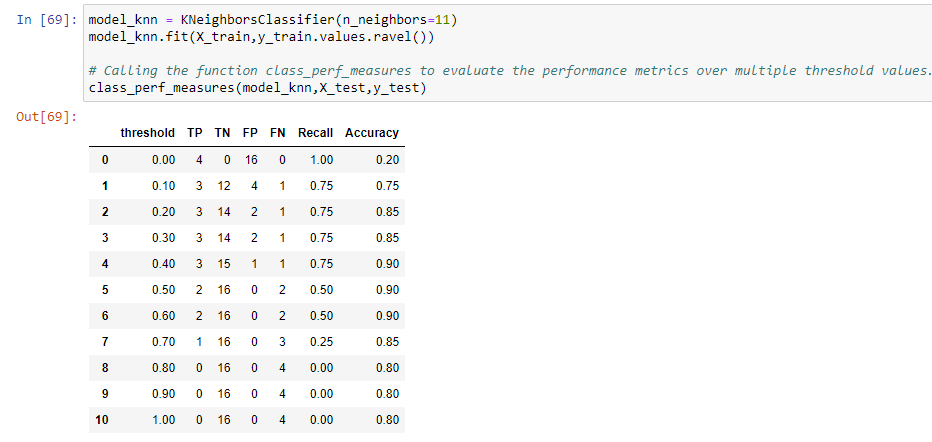

> In KNN, where k=11 the ideal choice would be to go with the probability threshold of 0.50. It minimizes the False Positive rate, and brings it down to the ideal scenario where it is 0%. Precision is also at it's peak, and the accuracy of the model also seems to be pretty good.

### 3.2 Model 2 <a class="anchor" id="model002"></a> 

#### Logistic Regression

In [20]:
model_logit = LogisticRegression()
model_logit.fit(X_train,y_train.values.ravel())
class_perf_measures(model_logit,X_test,y_test)

C:\Users\Amit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FPR,FN,FNR,Precision,Recall,F1-score,Accuracy
0,0.00,4,0,16,1.00,0,0.00,0.20,1.00,0.33,0.20
1,0.10,4,10,6,0.38,0,0.00,0.40,1.00,0.57,0.70
2,0.20,3,14,2,0.12,1,0.25,0.60,0.75,0.67,0.85
3,0.30,3,15,1,0.06,1,0.25,0.75,0.75,0.75,0.90
4,0.40,3,15,1,0.06,1,0.25,0.75,0.75,0.75,0.90
5,0.50,2,16,0,0.00,2,0.50,1.00,0.50,0.67,0.90
6,0.60,1,16,0,0.00,3,0.75,1.00,0.25,0.40,0.85
7,0.70,1,16,0,0.00,3,0.75,1.00,0.25,0.40,0.85
8,0.80,1,16,0,0.00,3,0.75,1.00,0.25,0.40,0.85
9,0.90,1,16,0,0.00,3,0.75,1.00,0.25,0.40,0.85


> In Logistic Regression, the ideal choice would be to go with the probability threshold of 0.50. It minimizes the False Positive rate, and brings it down to the ideal scenario where it is 0%. Precision is also at it's peak, and the accuracy of the model also seems to be pretty good at 90%

### Summary

- 'k' hyper-paramter has been assigned the value of 11.
- We have run the KNN Classifier with k=11, over multiple threshold values.
- We have also run the Logistic Regression, over multiple threshold values.

## 4. Model Comparison <a class="anchor" id="comparison"></a>

> [Table of Contents](#steps)

For comparing the KNN and Logistic Regression models, we will be considering both the Precision and the Accuracy to compute which model is performing better.

At 0.50 Threshold, both the models gave similar performances with Precision of 1, and Accuracy of 0.90. Hence, we will be moving forward with the ROC Curve to compute the area under the curve on different probability thersholds. The model with the highest AUC is considered as a better fit model.

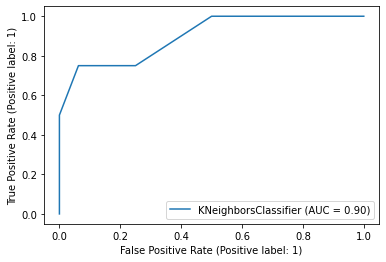

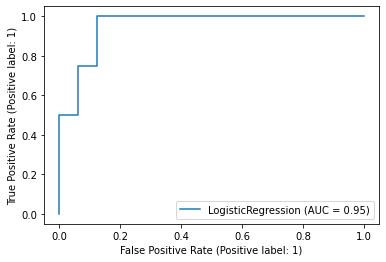

In [21]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(model_knn,X_test,y_test)
plt.show()

metrics.RocCurveDisplay.from_estimator(model_logit,X_test,y_test)
plt.show()

From the above ROC Curves we can compute that Logistic Regression is a better model for this dataset then KNN Classifier. 

## 5. Model Evaluation <a class="anchor" id="evaluation"></a>

> [Table of Contents](#steps)

.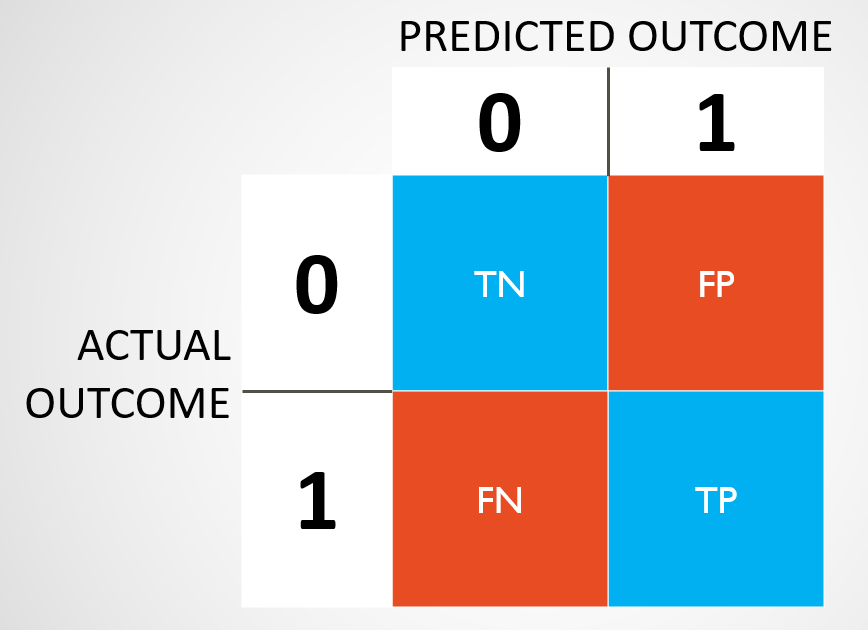


In this problem we are looking to minimize the **False Positives**, We don't want to falsly predict whether an employee will be able to finish the task at hand or not. As once the employees are assigned to a team with the responsibility of finishing a particular task, and if they are not able to finish it. It's going to hamper team's efficiency and work load. So, for efficiently manage the workload management of the team, we need to ensure the False Positives are at the minimum. 

<hr>

**False Negatives** is another performance measure to look at. It represents the number of negative predictions that were made falsly i.e., from this problems' point of view this is the number of employee who can actually finish the task at hand, but the prediction was made that they would not be able to do so. It is an important metric, however for our end goal False Positive seems to be bit costlier than the False Negatives as we want to efficiently manage the workload. 

<hr>

The **False Positive Rate** is calculated as FP/FP+TN, where FP is the number of false positives and TN is the number of true negatives (FP+TN being the total number of negatives). It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative.

<hr>

The **False Negative Rate** – also called the miss rate – is the probability that a true positive will be missed by the test. It’s calculated as FN/FN+TP, where FN is the number of false negatives and TP is the number of true positives (FN+TP being the total number of positives).

<hr>

**Precision** 
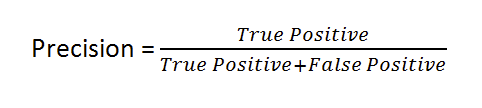

Precision talks about how precise your model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high.

<hr>

[**Probability Thresholds**](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.

For example, on a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

- Prediction < 0.5 = Class 0
- Prediction >= 0.5 = Class 1

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. This could be possible when, 
- The class distribution is severely skewed.
- The cost of one type of misclassification is more important than another type of misclassification.

Hence, for the Logistic Regression we will compute the metrics at different thresholds and interpret the results.

<hr>


<h1>Threshold: 0.30</h1>

| Threshold:     	    |        0.30                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 6%                                            |
| False Negative Rate:  | 25%                                           |
| Precision:            | 0.75                                          |
| Accuracy:             | 0.90                                          |

> At Threshold 0.30, the **False Positive Rate** comes out to be 6%. There is only 6% probability that an employee won't be able to finish the task at hand, provided the model predicts that they will be able to. 6% is a pretty low probabilty of occurance of a false positive event. Such occurances can lead to workload management issues, employees will be tasked to complete a specific work which the model predicted that they can, but won't be able to finish. Hence, impacting the team efficiency and the increasing the workload on other colleagues. 

> **False Negative Rate** comes out to be 25%, which is moderate. It signifies that, there is 25% probability that an employee will be able to finish the task at hand, provided the model predicted that they won't be able to. Such occurances have low impact on the workload management, employees who are not expected to finish a particular task at hand will be able to do it. This might even help the other team members, and might decrease the turn around time for the entire team.

> **Precision** It is the quality of a positive prediction made by the model. Our model is 75% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case. 

<hr>

<h1>Threshold: 0.50</h1>

| Threshold:     	    |        0.50                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 0%                                            |
| False Negative Rate:  | 50%                                           |
| Precision:            | 1                                             |
| Accuracy:             | 0.90                                          |

> At Threshold 0.50, the **False Positive Rate** comes out to be 0%. There is 0% probability that an employee won't be able to finish the task at hand, provided the model predicts that they will be able to. 0% is the ideal value for our business case. Here the employees who will be tasked to complete a specific work which the model predicted that they can, will be able to finish the task at hand. Hence, there will be no impact on the team efficiency, and occurance of workload management issues will be null.

> **False Negative Rate** comes out to be 50%, which is moderately high. It signifies that, there is 50% probability that an employee will be able to finish the task at hand, provided the model predicted that they won't be able to. Such occurances have moderate impact on the workload management, employees who are not expected to finish a particular task at hand will be able to do it. This might even help the other team members to a certain extent, and might decrease the turn around time for the entire team. But, a high value of False Negatives, may cause other problems to the business eg, HR team would be interested in hiring more employees who are more capable of finishing the task at hand, then utilising the existing employees.

> **Precision** It is the quality of a positive prediction made by the model. Our model is 100% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case.

<hr>


<h1>Threshold: 0.70</h1>

| Threshold:     	    |        0.70                                   |
| :---                  | :---                                          |
| False Positive Rate: 	| 0%                                            |
| False Negative Rate:  | 75%                                           |
| Precision:            | 1                                             |
| Accuracy:             | 0.85                                          |

> At Threshold 0750, the **False Positive Rate** comes out to be 0%. There is 0% probability that an employee won't be able to finish the task at hand, provided the model predicts that they will be able to. 0% is the ideal value for our business case. Here the employees who will be tasked to complete a specific work which the model predicted that they can, will be able to finish the task at hand. Hence, there will be no impact on the team efficiency, and occurance of workload management issues will be null.

> **False Negative Rate** comes out to be 75%, which is high. It signifies that, there is 75% probability that an employee will be able to finish the task at hand, provided the model predicted that they won't be able to. Such occurances have a moderately high impact on the workload management, employees who are not expected to finish a particular task at hand will be able to do it. This might even help the other team members to a certain extent, and might decrease the turn around time for the entire team. But, a high value of False Negatives like this, may cause other problems to the business eg, HR team would be interested in hiring more employees who are more capable of finishing the task at hand, then utilising the existing employees. This scenario might cause more money to the company.

> **Precision** It is the quality of a positive prediction made by the model. Our model is 100% precise in predicting the positives out of all the actual positives. It is good measure if False Positives are costlier, which is valid in our case. 

<hr>

## 6. Conclusion <a class="anchor" id="conclusion"></a>

> [Table of Contents](#steps)

After careful consideration of multiple probability threshold options and the corresponding speculated risks/costs. Probabilty Threshold of **0.50** seems to be the ideal choice here. At 0.50 threshold, the False Positive rate is at 0%, which is ideal for our business case. There is 0% probability that an employee won't be able to finish the task at hand, provided the model predicts that they will be able to.The Model is predicting at a precision of 100%, and has a accuracy of 90%. Our model is 100% precise in predicting the positives out of all the actual positives. Here, the False Positive Rate is also at bay i.e. at 50% which won't impact our business much negatively.This is by far the best performane across all the probability thresholds.

<hr>

## 7. Deployment <a class="anchor" id="deployment"></a>

> [Table of Contents](#steps)


In [22]:
pickle_out = open('classifier_workload', mode='wb')                    # Here we are creating a new object 'pickle_out'. This will contain a new file 'classifier'  
                                                                       # in wb(write binary) mode to save the pickled data.

pickle.dump(model_logit, pickle_out)                                   # Here, the Logistic model is converted into byte stream and saved in 'model_logit'.
pickle.dump(model_knn, pickle_out)                                     # Here, the KNN model is converted into byte stream and saved in 'model_knn'.
features = [features_means, features_std]                              # Creating a list of features to pass into the pickle file
pickle.dump(features, pickle_out)

pickle_out.close()                                                     # Closing the file object. 

In [23]:
%%writefile Workload_management_app.py                                                     
                                                                       # %%writefile is used to write the code in this given block to a file called app.py, which will
                                                                       # be created in the same directory. 
import pickle                                                          # Importing the Pickle Library here to execute the app.py file without fail.
import streamlit as st                                                 # Importing the Streamlit library. Streamlit lets you turn data scripts into shareable web apps.
import extra_streamlit_components as stx
import time

pickle_in = open('classifier_workload', 'rb')                                   # Opening Classifier in read-byte mode. 
model_logit = pickle.load(pickle_in)                                   # Pickle load is used to load pickled data from a file-like object.
model_knn = pickle.load(pickle_in)                                     # HEre, pickle is loading both KNN and Logistic regression models.
features = pickle.load(pickle_in)
st.set_page_config(layout="centered")

IMAGE_URL = "https://i.ibb.co/YkKNYSx/asasa.png" 
st.image(IMAGE_URL, width=700)
# <a href="https://ibb.co/JsSfV74"><img src= alt="ese" border="0"></a>
# st.write('Worload Prediction Model')

@st.cache()                                                            # Marking the function with cache decorator (st.cache()) will allow streamlit to keep all the 
                                                                       # states of a function in the memory. Hence, on every refresh the function definition is not executed.
    
def prediction(emp_exp_logit,training_level4,training_level6,training_level8,chosen_id):
    if chosen_id == '1':                                               # Based on the user's preference we are running the model (KNN or Logistic)
        classifier = model_knn
        model = 'KNN'
    else: 
        classifier = model_logit
        model = 'Logistic Regression'
        
        
    prediction = classifier.predict(                                   # method predict() that will essentially use the learned parameters by fit() in order to
                                                                       # perform predictions for each test instance.
        [[emp_exp_logit,training_level4,training_level6,training_level8]])
  
    return (prediction,model)


def main():                                                           # This is the main function in which we define our webpage

    training_level4,training_level6,training_level8=0,0,0             # Using a slide bar to input the employee work experience
    emp_exp_logit = st.slider("Employee Experiences",
                                  min_value=0.0,
                                  max_value=14.00,
                                  value=0.0,
                                  step=0.10,
                                 )

    training_level = st.selectbox('Please select the level of training the employee had',
                              ('Level 4',
                               'Level 6',                            # Creating a drop down to handle the categorical variables.
                               'Level 8'
                              )
                                 )
               
    if training_level=='Level 4':                                    # Based on the used's preference populating the training_level4, training_level6, training_level8 columns in dataset.
                                  training_level4 =1
    elif training_level=='Level 6':
                                  training_level6 =1
    elif training_level=='Level 8':
                                  training_level8 =1
            
    emp_exp_logit = (emp_exp_logit-features[0][0])/features[1][0]



            
    chosen_id = stx.tab_bar(data=[                                   # Allowing user to choose between the models.
    stx.TabBarItemData(id=1, title="KNN Classifier", description="FPR: 0% | Precision: 100% | Accuracy: 90%"),
    stx.TabBarItemData(id=2, title="Logistic Regression", description="FPR: 0% | Precision: 100% | Accuracy: 90%"),
    ],default=1)
    st.info('Recommendation based on the AUC-ROC Curve: Logistic Regression', icon="ℹ️")

  
    result = ""
                                  
    if st.button("Predict"):                                          # When 'Predict' is clicked(using st.button), make the prediction and store it in result.
        results = prediction(emp_exp_logit,training_level4,training_level6,training_level8,chosen_id)
        with st.spinner('Running the '+results[1]+' model'):
            time.sleep(1)
            if results[0] == 0:
                st.error('Task will not be completed!', icon="🚨")
            else:
                st.success('Task will be completed!', icon="✅")
#                 st.balloons()
            

            
if __name__=='__main__':                                              # The value of __name__ attribute is set to “__main__” when module is run as main program. 
    main()
    

Overwriting Workload_management_app.py


In [ ]:
!streamlit run Workload_management_app.py                                                 # Running the app.py using streamlit.